# Разложение в ряд Фурье

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


## Задание №1

In [29]:
T = 2.0
A = 2.0
F = 100
N0 = 1000
START = -4.0
END = 4.0

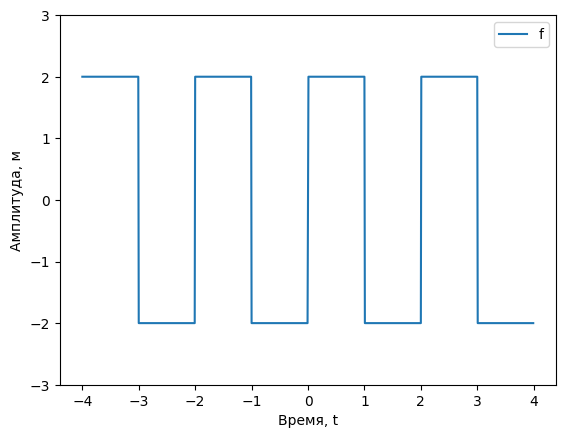

In [30]:
# Нахождение циклической частоты через период
def cyclic_frequency(T):
    return 2 * np.pi / T

# Функция прямоугольного сигнала
def func_1(x, T, A):
    y = A * np.sign(np.tan(np.pi * x / T))
    return y

x1 = np.linspace(START, END, 1000, endpoint = False)
y1 = np.array([func_1(t, T, A) for t in x1 ])
plt.ylim(-3, 3)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.plot(x1, y1)
plt.legend('f(x)')

plt.show()


### Разложение в ряд Фурье

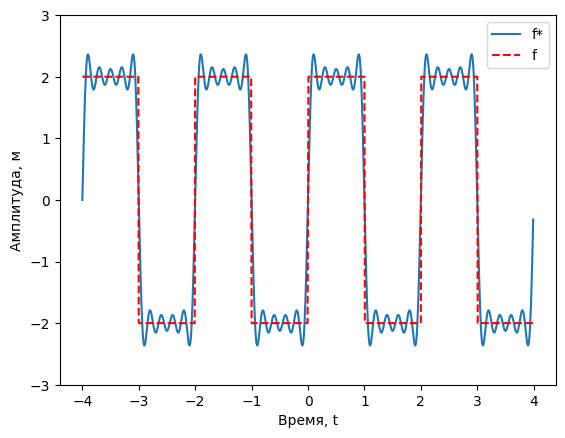

In [31]:
# Разложение прямоугольного сигнала в ряд Фурье
def Fourier_expansion(START, END, T, N):
    w = cyclic_frequency(T)
    a0 = 1 / T * integrate.quad(func_1, 0, T, args=(T,A))[0]
    an = lambda n : 2 / T * integrate.quad(lambda t : func_1(t, T, A) * np.cos(n * w * t), 0, T)[0]
    bn = lambda n : 2 / T * integrate.quad(lambda t : func_1(t, T, A) * np.sin(n * w * t), 0, T)[0]
    x = np.linspace(START, END, 1000, endpoint = False)
    y = np.array([np.sum([an(n) * np.cos(n * w * t) + bn(n) * np.sin(n * w * t) for n in range(1, N)]) + a0 for t in x])
    return x, y 

x_1, y_1 = Fourier_expansion(START, END, T, 10)
plt.ylim(-3, 3)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.plot(x_1, y_1)
plt.plot(x1, y1, 'r--')
plt.legend(['f*', 'f'])
plt.show() 


### Вычисление погрешности

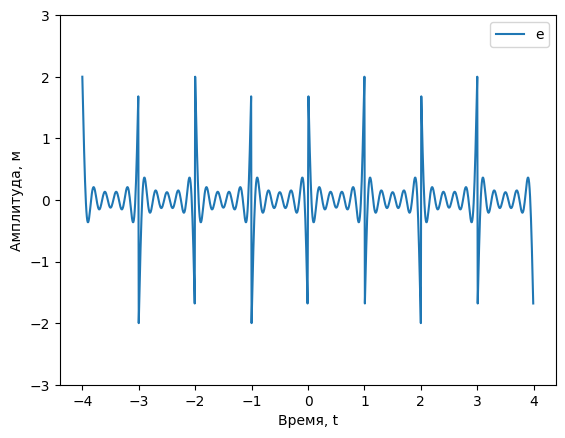

In [32]:
# Вычисление погрешности измерения
Y = y1 - y_1
plt.ylim(-3,3)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.plot(x1,Y)
plt.legend('e')
plt.show() 

## Задание №2

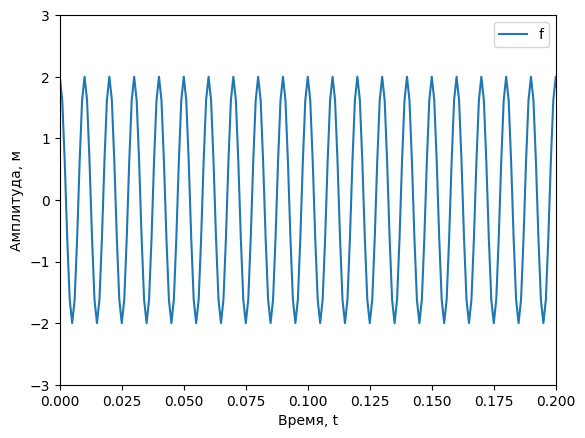

In [33]:
START = 0.0
END = 1.0

# Функция нахождения циклической частоты через частоту
def cyclic_frequency_(f):
    return 2 * np.pi * f

# Функция косинуса
def func_2(x, f, A):
    return A * np.cos(cyclic_frequency_(f) * x)

x2 = np.linspace(START, END, 1000, endpoint = False)
y2 = np.array([func_2(t, F, A) for t in x2 ])
plt.ylim(-3, 3)
plt.xlim(0, 0.2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.plot(x2, y2)
plt.legend('f')
plt.show()

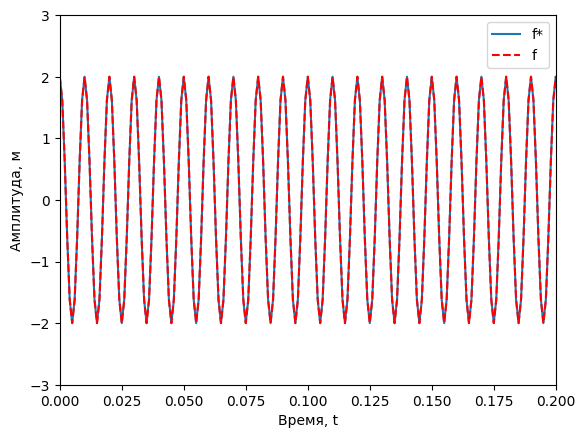

In [34]:
# Разложение в ярд Фурье четной функции
def Fourier_expansion_(START, END, f, N):
    w = cyclic_frequency_(f)
    T = 1 / f
    a0 = 1 / T * integrate.quad(func_2, 0, T, args=(f,A))[0]
    an = lambda n : 2 / T * integrate.quad(lambda t : func_2(t, f, A) * np.cos(n * w * t), 0, T)[0]
    x = np.linspace(START, END, 1000, endpoint = False)
    y = np.array([np.sum([an(n) * np.cos(n*w*t) for n in range(1, N)]) + a0 for t in x])
    return x, y 

x_2, y_2 = Fourier_expansion_(START, END, F, 10)
plt.ylim(-3,3)
plt.xlim(0, 0.2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.plot(x_2,y_2)
plt.plot(x2, y2, 'r--')
plt.legend(['f*','f'])
plt.show() 

### Спектр сигнала

/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


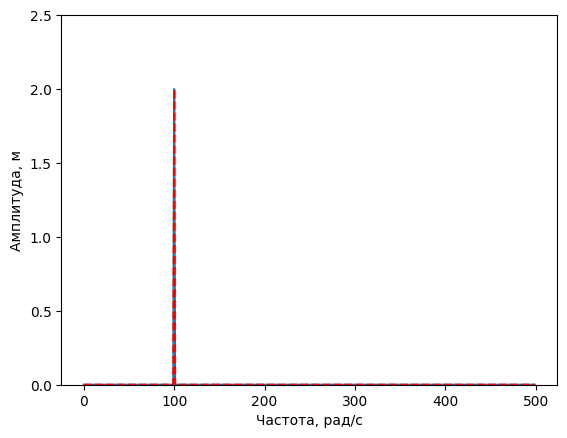

In [35]:
# Нахождение спектра сигнала
def spectrum(x, y) :
    xff = np.arange(len(x))
    xff = xff[range(len(x) // 2)]
    yff = np.fft.fft(y) / len(x)
    yff = yff[range(len(x) // 2)]
    return xff, yff 

xf1, yf1 = spectrum(x2, y2)
xf2, yf2 = spectrum(x_2, y_2)
plt.ylim(0, 2.5)
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, м')
plt.plot(xf1, A * yf1)
plt.plot(xf2, A * yf2, 'r--')
plt.show()

## Задание №3

In [36]:
T = 0.2

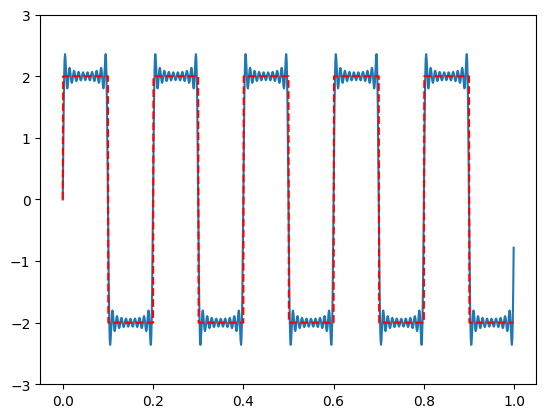

In [37]:
x1 = np.linspace(START, END, 1000, endpoint = False)
y1 = np.array([func_1(t, T, A) for t in x1 ])
x_1, y_1 = Fourier_expansion(START, END, T, 20)

plt.ylim(-3, 3)
plt.plot(x_1, y_1)
plt.plot(x1, y1, 'r--')
plt.show() 

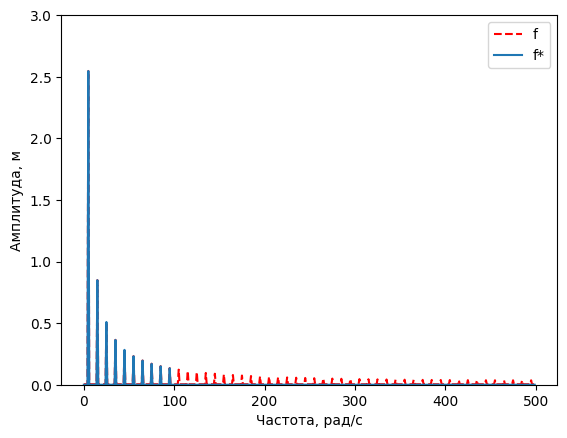

In [38]:
# Нахождение спектра прямоугольного сигнала
xf1, yf1 = spectrum(x1, y1)
# Вычисление найденного спектра
xf2, yf2 = spectrum(x_1, y_1)

plt.ylim(0, 3)
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, м')
plt.plot(xf1, np.abs(A * yf1), 'r--')
plt.plot(xf2, np.abs(A * yf2))
plt.legend(['f','f*'])
plt.show()


## Задание №4

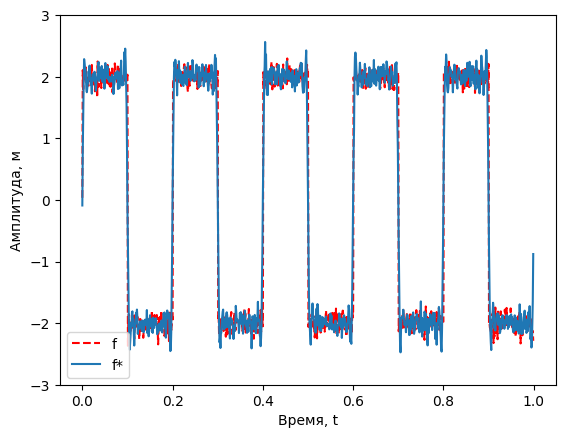

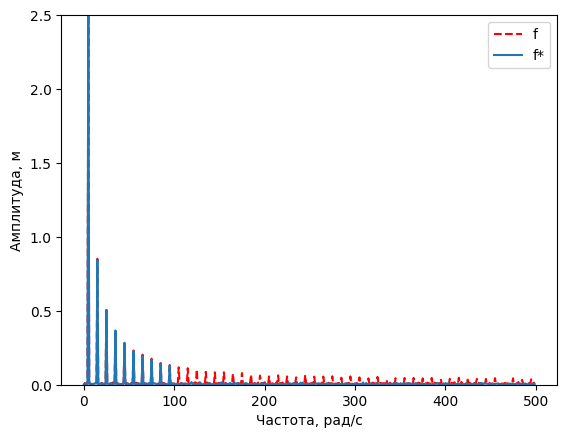

In [39]:
# Добавление гауссовского шума
y1 = y1 + np.random.normal(0, 0.1, len(x1)) 
y_1= y_1 + np.random.normal(0, 0.1, len(x_1))
plt.ylim(-3,3)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.plot(x1, y1, 'r--')
plt.plot(x_1, y_1)
plt.legend(['f','f*'])
plt.show() 

# Нахождение спектра сигнала
xf1, yf1 = spectrum(x1, y1)
xf2, yf2 = spectrum(x_1, y_1)
plt.ylim(0, 2.5)
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, м')
plt.plot(xf1, np.abs(A * yf1), 'r--')
plt.plot(xf2, np.abs(A * yf2))
plt.legend(['f','f*'])
plt.show()

## Треугольный сигнал

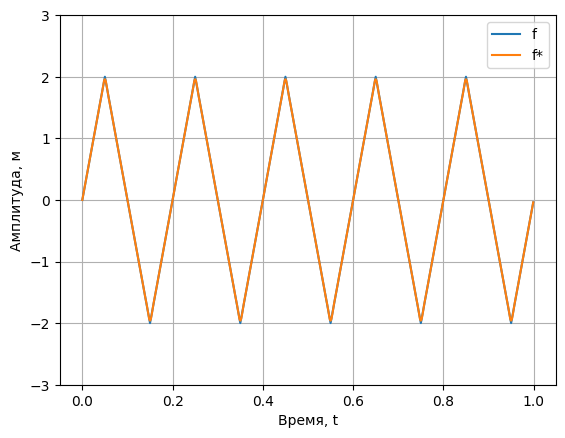

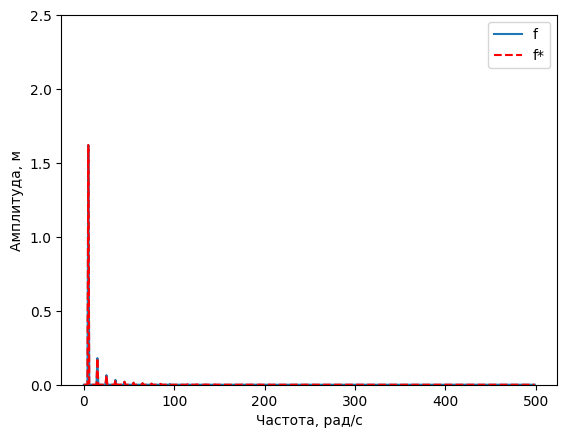

In [40]:
def func_3(x, T, A):
    return A * 2 / np.pi * np.arcsin(np.sin(x * np.pi * 2 / T))

def Fourier_expansion_2(START, END, T, N):
    w = cyclic_frequency(T)
    a0 = 1 / T * integrate.quad(func_1, 0, T, args=(T,A))[0]
    an = lambda n : 2 / T * integrate.quad(lambda t : func_3(t, T, A) * np.cos(n * w * t), 0, T)[0]
    bn = lambda n : 2 / T * integrate.quad(lambda t : func_3(t, T, A) * np.sin(n * w * t), 0, T)[0]
    x = np.linspace(START, END, 1000, endpoint = False)
    y = np.array([np.sum([an(n) * np.cos(n * w * t) + bn(n) * np.sin(n * w * t) for n in range(1, N)]) + a0 for t in x])
    return x, y 

x3 = np.linspace(START, END, 1000, endpoint = False)
y3 = np.array([func_3(t, T, A) for t in x1 ])
x_3, y_3 = Fourier_expansion_2(START, END, T, 20)

plt.ylim(-3, 3)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда, м')
plt.plot(x3, y3)
plt.plot(x_3, y_3)
plt.grid(True)
plt.legend(['f','f*'])
plt.show()

xf3, yf3 = spectrum(x3, y3)
xf_3, yf_3 = spectrum(x_3, y_3)
plt.ylim(0, 2.5)
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, м')
plt.plot(xf_3, np.abs(A * yf_3))
plt.plot(xf3, np.abs(A * yf3), 'r--')
plt.legend(['f','f*'])
plt.show()